In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/ML_assignment/ERA_V1/S7/ToSubmit/"

Mounted at /content/drive
/content/drive/MyDrive/ML_assignment/ERA_V1/S7/ToSubmit


#Step 9
Adjusting Batch Size.

#Results:
*  Parameters: 6.1k
*  Best Train Accuracy: 99.12
*  Best Test Accuracy: 99.47

#Analysis
*  After a trial and error method, found that the batch size - 64 works best for the model.

#Journey of the model

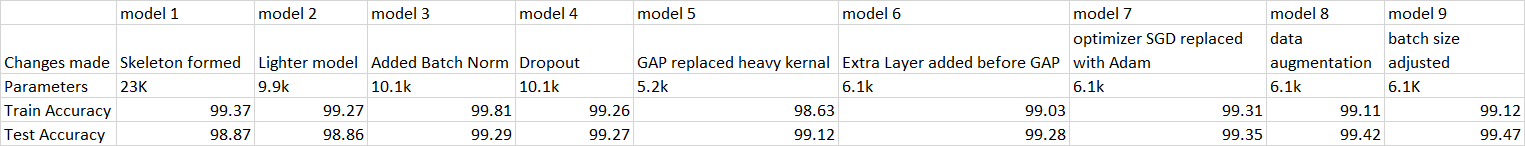

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net, train_model, test_model
from utils import plot_data, plot_loss_accuracy

In [3]:
# Device configuration -use CUDA tensor types if available
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
print("CUDA Available?", cuda)
SEED = 1
# For reproducibility
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)

CUDA Available? False


In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-7., 7.), fill=0),
    transforms.ToTensor(),   #convert image to PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,)), #normalize test with  mean=0.1307 & standard deviation 0.3081
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) #apply the same normalization of train set to test set
    ])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms) #loads train-images-idx3-ubyte: training set images
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)  #loads t10k-images-idx3-ubyte

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

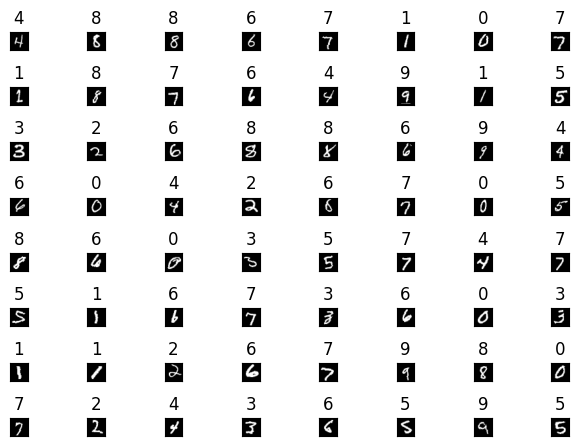

In [ ]:
import matplotlib.pyplot as plt
batch_data, batch_label = next(iter(train_loader))
# batch_data, batch_label = next(iter(test_loader))
plot_data(batch_data, batch_label, 64, 8, 8)

In [ ]:
# #This class contains the architecture of the neural network
# class Net(nn.Module):
#   def __init__(self):
#     super(Net, self).__init__()
#     dropout = 0.1
#     self.conv1 = nn.Sequential(
#         nn.Conv2d(1, 8, 3, bias=False, padding=1), #Image Input: 28x28x1 -> 28x28x16  #Receptive Field 1 -> 3
#         nn.ReLU(),
#         nn.BatchNorm2d(8),
#         nn.Dropout(dropout),
#         nn.Conv2d(8, 16, 3, bias=False), #Input: 28x28x16 -> 26x26x32  #Receptive Field 3 -> 5
#         nn.ReLU(),
#         nn.BatchNorm2d(16),
#         nn.Dropout(dropout),
#         #Transition Block = MaxPool + 1x1 Convolution
#         nn.MaxPool2d(2, 2),    #Input: 13x13x32 -> 13x13x32  #Receptive Field  5 -> 6
#         nn.Conv2d(16, 8, 1, bias=False)   #Input: 13x13x32 -> 13x13x16  #Receptive Field  6 -> 6
#     )

#     self.conv2 = nn.Sequential(
#         nn.Conv2d(8, 8, 3, bias=False),  #Input: 13x13x16 -> 11x11x16  #Receptive Field  6 -> 10
#         nn.ReLU(),
#         nn.BatchNorm2d(8),
#         nn.Dropout(dropout),
#         nn.Conv2d(8, 8, 3, bias=False),  #Input: 11x11x16 -> 9x9x32  #Receptive Field  10 -> 14
#         nn.ReLU(),
#         nn.BatchNorm2d(8),
#         nn.Dropout(dropout)
#     )
#     self.conv3 = nn.Sequential(
#         nn.Conv2d(8, 16, 3, bias=False),  #Input: 9x9x32 -> 7x7x16  #Receptive Field  14 -> 18
#         nn.ReLU(),
#         nn.BatchNorm2d(16),
#         nn.Dropout(dropout),
#         nn.Conv2d(16, 10, 3, bias=False),  #Input: 7x7x16 -> 5x5x16  #Receptive Field  18 -> 22
#         nn.ReLU(),
#         nn.BatchNorm2d(10)
#     )
#     self.conv4 = nn.Sequential(
#         nn.Conv2d(10, 10,3, bias=False), #Input: 5x5x16 -> 1x1x10  #Receptive Field  22 -> 26
#         nn.AdaptiveAvgPool2d((1, 1))
#         )

#   def forward(self, x):
#     x = self.conv1(x)
#     x = self.conv2(x)
#     x = self.conv3(x)
#     x = self.conv4(x)
#     x = x.view(-1, 10)
#     x = F.log_softmax(x, dim=1)
#     return x

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [ ]:
model = Net().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.01)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
#Negative log likelihood loss function is used to classify 10 classes [0-9 digits]
criterion = nn.NLLLoss()
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_loss = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy.append(train_acc)
  train_losses.append(train_loss)
  test_acc, test_loss = test_model(model, device, test_loader, criterion)
  test_accuracy.append(test_acc)
  test_losses.append(test_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0684 Batch_id=937 Accuracy=95.03: 100%|██████████| 938/938 [01:05<00:00, 14.38it/s]


Test set: Average loss: 0.0009, Accuracy: 9810/10000 (98.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0671 Batch_id=937 Accuracy=97.52: 100%|██████████| 938/938 [01:01<00:00, 15.19it/s]


Test set: Average loss: 0.0007, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0638 Batch_id=937 Accuracy=97.82: 100%|██████████| 938/938 [00:57<00:00, 16.19it/s]


Test set: Average loss: 0.0007, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0138 Batch_id=937 Accuracy=98.01: 100%|██████████| 938/938 [00:59<00:00, 15.88it/s]


Test set: Average loss: 0.0007, Accuracy: 9851/10000 (98.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0350 Batch_id=937 Accuracy=98.12: 100%|██████████| 938/938 [00:59<00:00, 15.82it/s]


Test set: Average loss: 0.0006, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0129 Batch_id=937 Accuracy=98.22: 100%|██████████| 938/938 [01:00<00:00, 15.54it/s]


Test set: Average loss: 0.0005, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.1672 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [00:58<00:00, 15.99it/s]


Test set: Average loss: 0.0004, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0157 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [00:58<00:00, 16.01it/s]


Test set: Average loss: 0.0003, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.0402 Batch_id=937 Accuracy=99.00: 100%|██████████| 938/938 [00:58<00:00, 16.02it/s]


Test set: Average loss: 0.0003, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0006 Batch_id=937 Accuracy=99.04: 100%|██████████| 938/938 [01:00<00:00, 15.45it/s]


Test set: Average loss: 0.0003, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0138 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:58<00:00, 15.96it/s]


Test set: Average loss: 0.0003, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0131 Batch_id=937 Accuracy=99.05: 100%|██████████| 938/938 [00:58<00:00, 16.13it/s]


Test set: Average loss: 0.0003, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.0039 Batch_id=937 Accuracy=99.07: 100%|██████████| 938/938 [00:58<00:00, 15.97it/s]


Test set: Average loss: 0.0003, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.0153 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:58<00:00, 15.92it/s]


Test set: Average loss: 0.0003, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.1812 Batch_id=937 Accuracy=99.12: 100%|██████████| 938/938 [01:00<00:00, 15.42it/s]


Test set: Average loss: 0.0003, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-04.


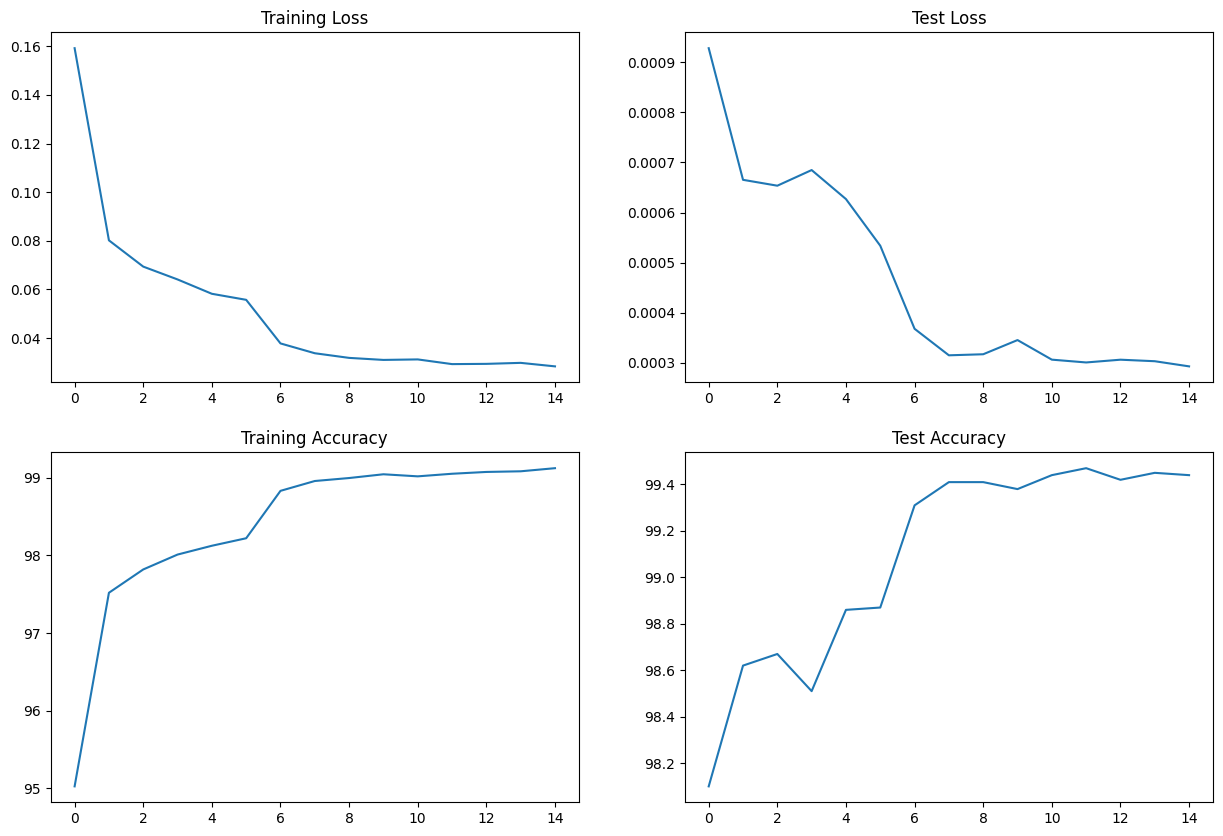

In [ ]:
plot_loss_accuracy(train_losses, test_losses, train_accuracy, test_accuracy)

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 16, 26, 26]           1,152
              ReLU-6           [-1, 16, 26, 26]               0
       BatchNorm2d-7           [-1, 16, 26, 26]              32
           Dropout-8           [-1, 16, 26, 26]               0
         MaxPool2d-9           [-1, 16, 13, 13]               0
           Conv2d-10            [-1, 8, 13, 13]             128
           Conv2d-11            [-1, 8, 11, 11]             576
             ReLU-12            [-1, 8, 11, 11]               0
    